In [ ]:
#import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # Load dataset
# @st.cache_data
# def load_data():
#     return pd.read_csv(r'merged.csv')

df = pd.read_csv('/Users/martyna/dev/iron hack/labs/project-1-ironhack-payments-2-en/merged.csv')


# Convert date columns
df["cohort_month"] = pd.to_datetime(df["cohort_month"])
df["activity_month"] = pd.to_datetime(df["activity_month"])
df["created_at"] = pd.to_datetime(df["created_at"])
df["reimbursement_date"] = pd.to_datetime(df["reimbursement_date"], errors="coerce")
df["money_back_date"] = pd.to_datetime(df["money_back_date"], errors="coerce")



### Adding incidents section

In [34]:
# calculating incident count per cohort
df_inc = pd.read_csv('/Users/martyna/dev/iron hack/labs/project-1-ironhack-payments-2-en/project_dataset/extract - fees - data analyst - .csv')

In [ ]:
#filtering to only include incidents
df_inc = df_inc[df_inc["type"]=="incident"]

In [ ]:
#calculating incident counts per cash request
df_inc = df_inc.groupby("cash_request_id").size().reset_index(name="incident_count")

In [50]:
df_inc["cash_request_id"] = df_inc["cash_request_id"].astype(int)

In [64]:
df_plus_inc = df.merge(df_inc, how ='left', left_on='id', right_on='cash_request_id')

In [ ]:
#filling NaNs with 0, in case it's going to affect incident rate calculation
df_plus_inc["incident_count"] = df_plus_inc["incident_count"].fillna(0)

### End of inc part

In [69]:
# 1. Frequency of Service Usage
freq_usage = df.groupby(["cohort_month", "activity_month"])["user_id"].count().reset_index()
freq_usage.rename(columns={"user_id": "transaction_count"}, inplace=True)


### changed one cell below


In [77]:

# 2. Incident Rate
incident_rate = (
    df_plus_inc.groupby(["cohort_month", "activity_month"])["incident_count"]
    .sum()
    .reset_index()
)

In [79]:

# Merge incident rate with frequency data
cohort_analysis = pd.merge(freq_usage, incident_rate, on=["cohort_month", "activity_month"], how="left")
cohort_analysis["incident_count"] = cohort_analysis["incident_count"].fillna(0)
cohort_analysis["incident_rate"] = cohort_analysis["incident_count"] / cohort_analysis["transaction_count"]


In [19]:

# 3. Revenue Generated
revenue = df.groupby(["cohort_month", "activity_month"])["amount"].sum().reset_index()
revenue.rename(columns={"amount": "total_revenue"}, inplace=True)


In [20]:

# 3. Revenue Generated
revenue = df.groupby(["cohort_month", "activity_month"])["amount"].sum().reset_index()
revenue.rename(columns={"amount": "total_revenue"}, inplace=True)


In [21]:

# 4. New Metric: User Retention Rate
unique_users_per_month = df.groupby(["cohort_month", "activity_month"])["user_id"].nunique().reset_index()
unique_users_per_month.rename(columns={"user_id": "unique_users"}, inplace=True)






In [80]:
# Calculate User Retention Rate
first_month_users = df.groupby("cohort_month")["user_id"].nunique().reset_index()
first_month_users.rename(columns={"user_id": "initial_users"}, inplace=True)
cohort_analysis = cohort_analysis.merge(first_month_users, on="cohort_month", how="left")
cohort_analysis["initial_users"] = cohort_analysis["initial_users"].fillna(1)  # Avoid division errors

In [23]:
# Merge unique_users_per_month to ensure it's present
cohort_analysis = cohort_analysis.merge(unique_users_per_month, on=["cohort_month", "activity_month"], how="left", validate="one_to_one")
cohort_analysis["unique_users"] = cohort_analysis["unique_users"].fillna(0)

In [81]:
# Print column names for debugging
print("Columns in cohort_analysis:", cohort_analysis.columns)

Columns in cohort_analysis: Index(['cohort_month', 'activity_month', 'transaction_count', 'incident_count',
       'incident_rate', 'initial_users'],
      dtype='object')


In [25]:
# Calculate retention rate
cohort_analysis["retention_rate"] = cohort_analysis["unique_users"] / cohort_analysis["initial_users"]
print(cohort_analysis["retention_rate"])

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
        ...   
78    0.385514
79    0.011682
80    1.000000
81    0.003196
82    1.000000
Name: retention_rate, Length: 83, dtype: float64


In [82]:
# Merge all metrics
cohort_analysis = cohort_analysis.merge(revenue, on=["cohort_month", "activity_month"], how="left")

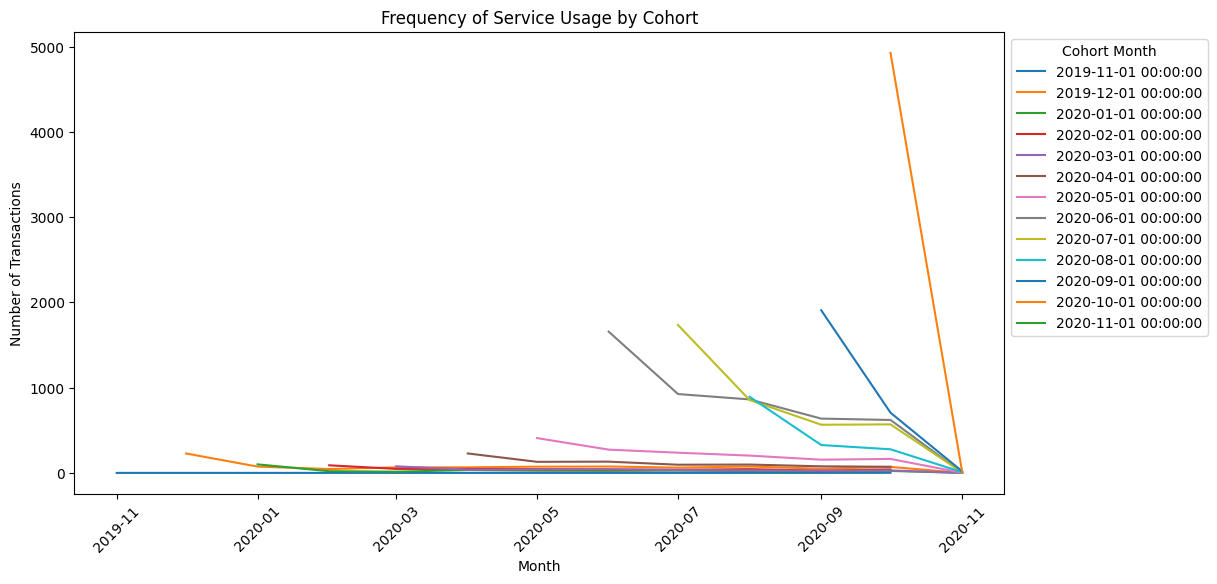

In [83]:
# Plot Frequency of Service Usage
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x="activity_month", y="transaction_count", hue="cohort_month", palette="tab10")
plt.title("Frequency of Service Usage by Cohort")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.legend(title="Cohort Month", bbox_to_anchor=(1, 1))
plt.show()

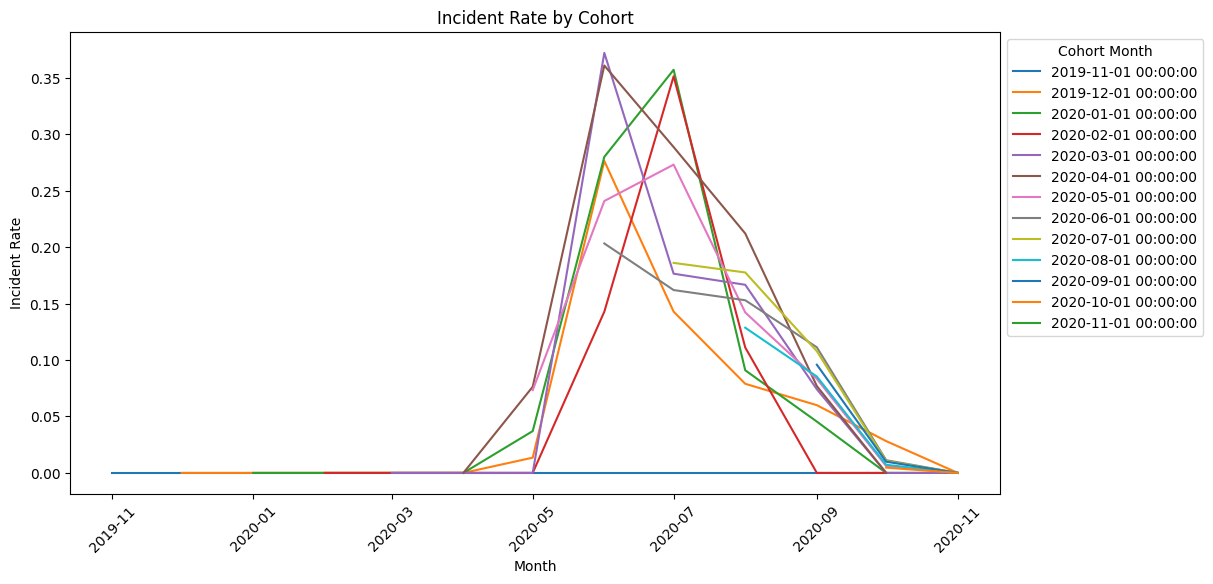

In [84]:
# Plot Incident Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x="activity_month", y="incident_rate", hue="cohort_month", palette="tab10")
plt.title("Incident Rate by Cohort")
plt.xlabel("Month")
plt.ylabel("Incident Rate")
plt.xticks(rotation=45)
plt.legend(title="Cohort Month", bbox_to_anchor=(1, 1))
plt.show()

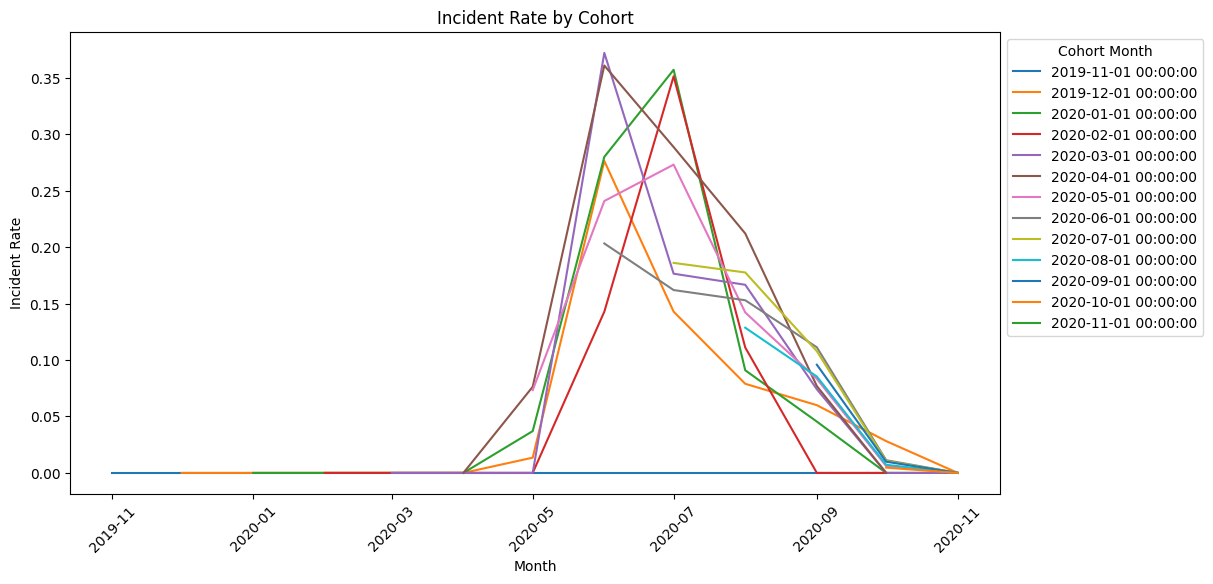

In [85]:
# Plot Incident Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x="activity_month", y="incident_rate", hue="cohort_month", palette="tab10")
plt.title("Incident Rate by Cohort")
plt.xlabel("Month")
plt.ylabel("Incident Rate")
plt.xticks(rotation=45)
plt.legend(title="Cohort Month", bbox_to_anchor=(1, 1))
plt.show()

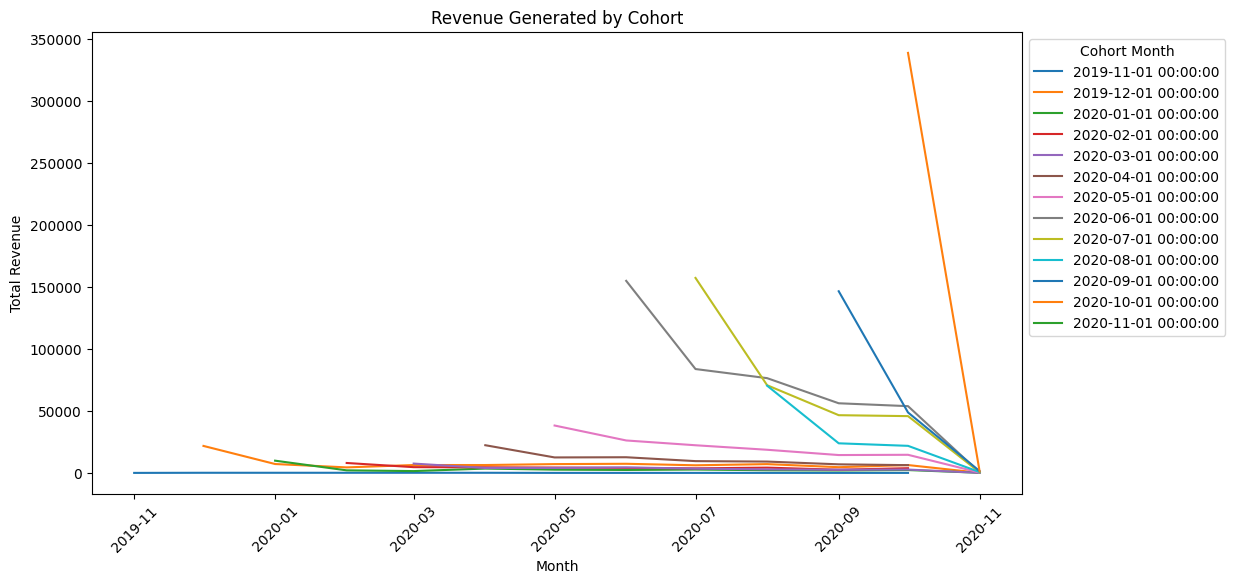

In [30]:
# Plot Revenue Generated
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x="activity_month", y="total_revenue", hue="cohort_month", palette="tab10")
plt.title("Revenue Generated by Cohort")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title="Cohort Month", bbox_to_anchor=(1, 1))
plt.show()

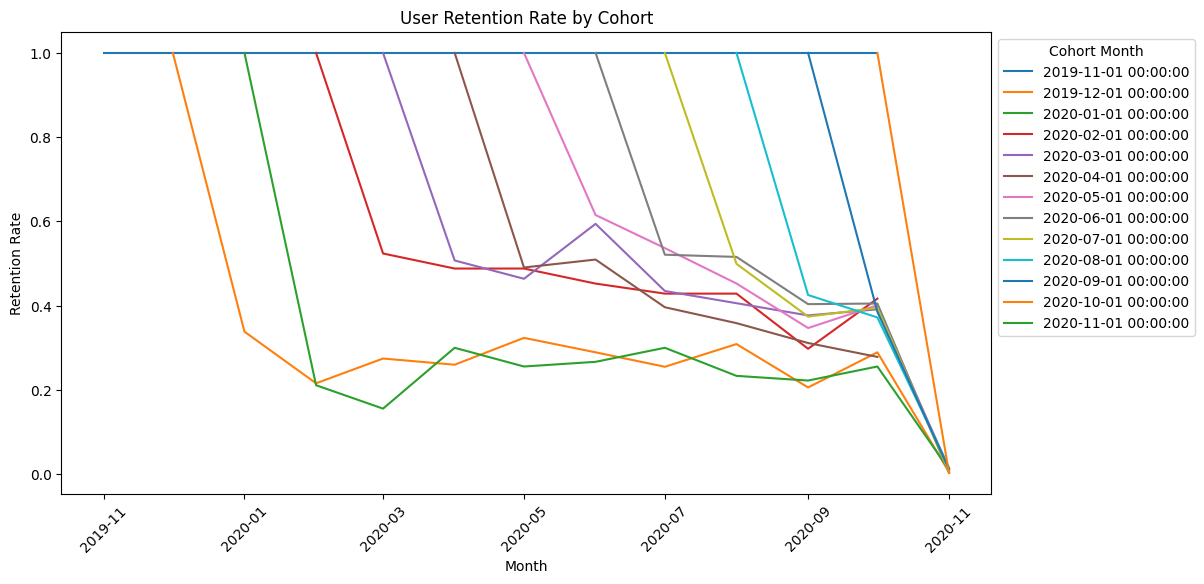

In [31]:
# Plot User Retention Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=cohort_analysis, x="activity_month", y="retention_rate", hue="cohort_month", palette="tab10")
plt.title("User Retention Rate by Cohort")
plt.xlabel("Month")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.legend(title="Cohort Month", bbox_to_anchor=(1, 1))
plt.show()


/var/folders/8m/yz8tmn5d3ns2cwtr98zklxtw0000gn/T/ipykernel_53938/1047535028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cohort_analysis, x="cohort_month", y="transaction_count", estimator=sum, palette="viridis")


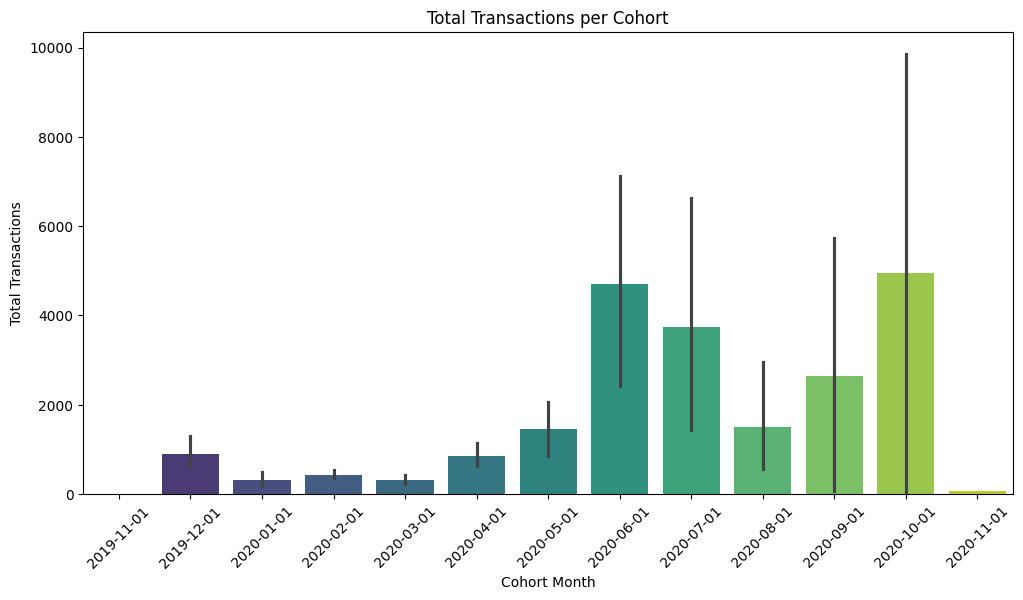

In [32]:
# Bar Plot: Total Transactions per Cohort
plt.figure(figsize=(12, 6))
sns.barplot(data=cohort_analysis, x="cohort_month", y="transaction_count", estimator=sum, palette="viridis")
plt.title("Total Transactions per Cohort")
plt.xlabel("Cohort Month")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.show()


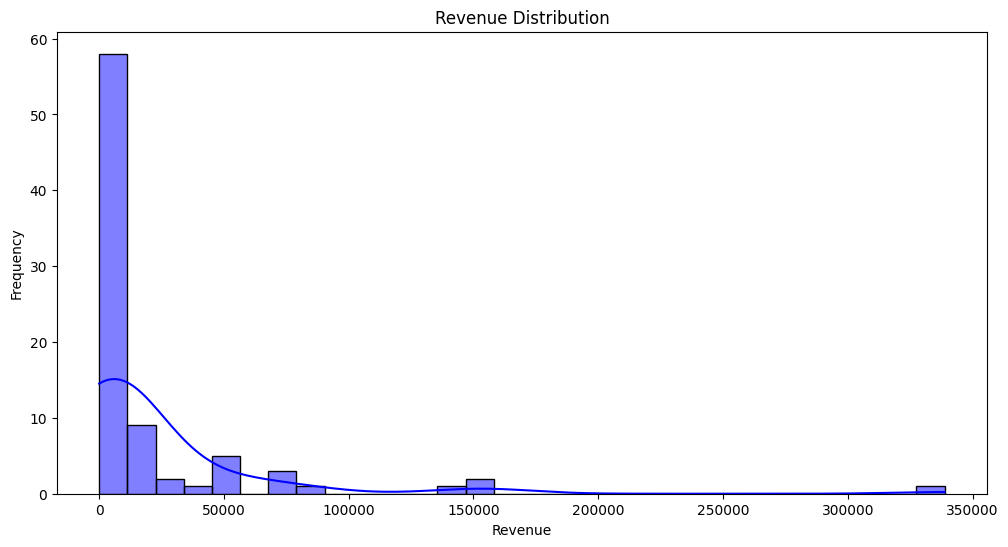

In [33]:
# Histogram: Distribution of Revenue
plt.figure(figsize=(12, 6))
sns.histplot(cohort_analysis["total_revenue"], bins=30, kde=True, color="blue")
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

### Trying histograms

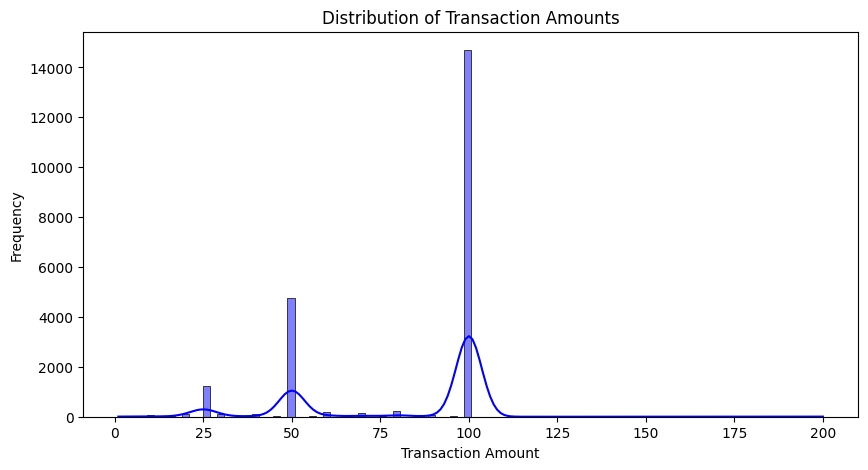

In [ ]:
#distribution of transaction amounts

plt.figure(figsize=(10, 5))
sns.histplot(df["amount"], bins=100, kde=True, color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()
#we can see that most users request 100 euros 

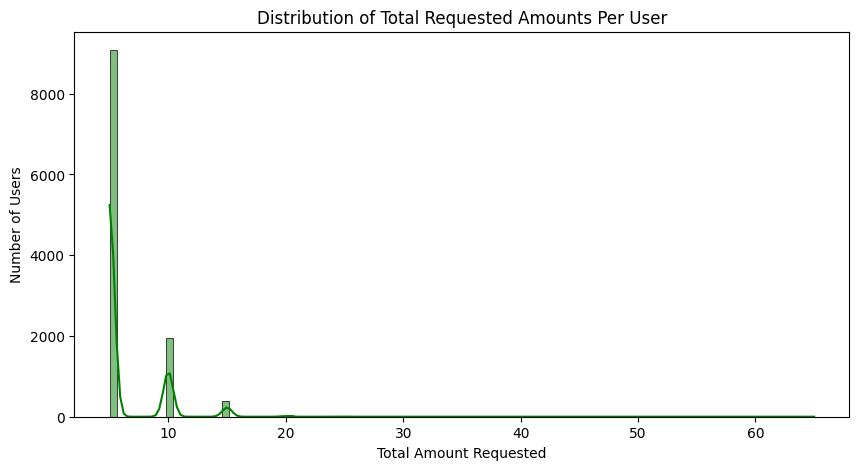

In [ ]:
#total requested cash per user
plt.figure(figsize=(10, 5))
sns.histplot(df["total_amount"], bins=100, kde=True, color="green")
plt.title("Distribution of Total Requested Amounts Per User")
plt.xlabel("Total Amount Requested")
plt.ylabel("Number of Users")
plt.show()

#we see that most users request less than 10 euros? 

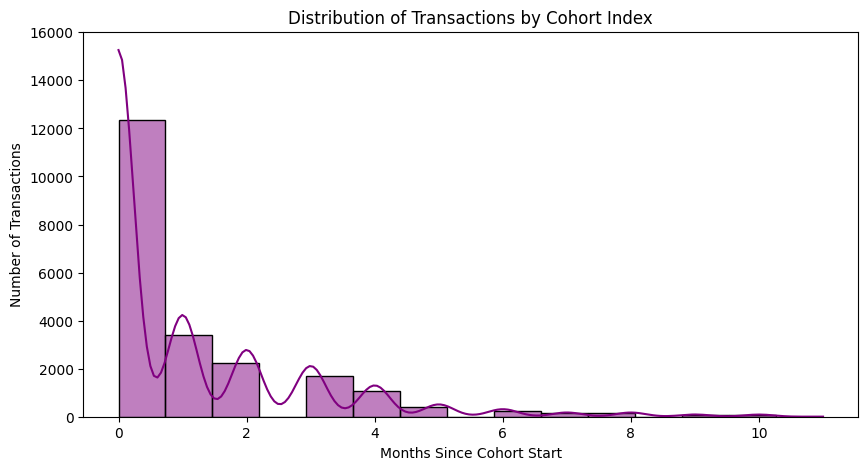

In [ ]:
#user activity by cohort index 
plt.figure(figsize=(10, 5))
sns.histplot(df["cohort_index"], bins=15, kde=True, color="purple")
plt.title("Distribution of Transactions by Cohort Index")
plt.xlabel("Months Since Cohort Start")
plt.ylabel("Number of Transactions")
plt.show()

# we see the biggest activity in the first 2 months since first transaction

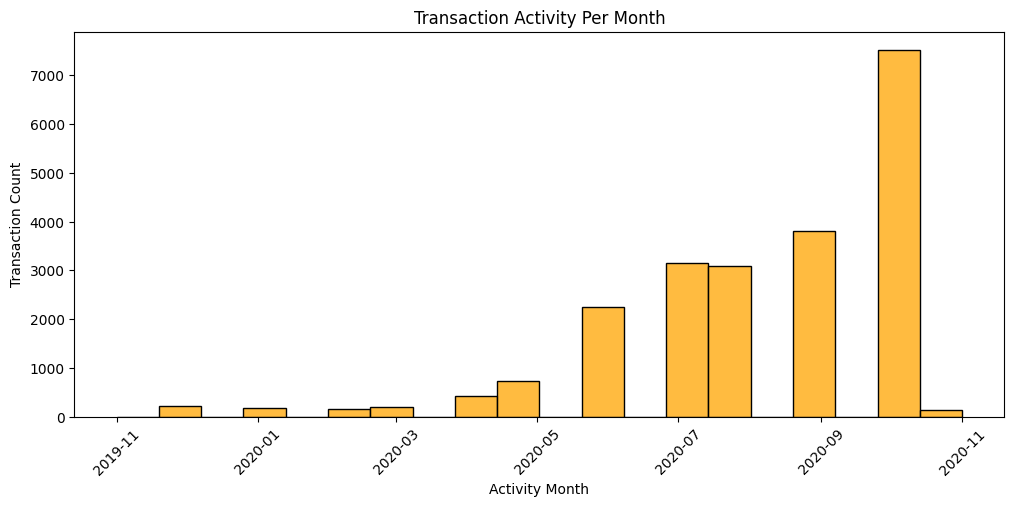

In [ ]:
#transaction activity per month
plt.figure(figsize=(12, 5))
sns.histplot(df["activity_month"], bins=20, kde=False, color="orange")
plt.title("Transaction Activity Per Month")
plt.xlabel("Activity Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.show()
#we see most activity in the last months of 2020